In [1]:
import json
import networkx as nx
import torch
import torch_geometric.transforms as T
from matplotlib import pyplot as plt
from torch_geometric.utils import to_networkx

import glgexplainer.utils as utils
from glgexplainer.local_explainations import read_lattice, lattice_classnames
from glgexplainer.models import LEN, GLGExplainer, LEEmbedder
from gnn4ua.datasets.loader import Targets, GeneralisationModes

In [2]:
DATASET_NAME = Targets.Distributive
generalisation_mode = GeneralisationModes.strong
task = DATASET_NAME
with open(f"config/{DATASET_NAME}_params.json") as json_file:
	hyper_params = json.load(json_file)

In [3]:
adjs_train, edge_weights_train, ori_classes_train, belonging_train, summary_predictions_train, le_classes_train = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='train'
)

adjs_test, edge_weights_test, ori_classes_test, belonging_test, summary_predictions_test, le_classes_test = read_lattice(
	target=task,
	mode=generalisation_mode,
	split='test'
)

device = "cpu"  # torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = T.Compose([
	T.NormalizeFeatures(),
])

In [4]:
dataset_train = utils.LocalExplanationsDataset("data_glg", adjs_train, "same",
											   transform=transform,
											   y=le_classes_train,
											   belonging=belonging_train,
											   task_y=ori_classes_train)
dataset_test = utils.LocalExplanationsDataset("data_glg", adjs_test, "same",
											  transform=transform,
											  y=le_classes_test,
											  belonging=belonging_test,
											  task_y=ori_classes_test)

train_group_loader = utils.build_dataloader(dataset_train, belonging_train,
											num_input_graphs=128)
test_group_loader = utils.build_dataloader(dataset_test, belonging_test,
										   num_input_graphs=256)

/Users/luke/PycharmProjects/AI4UA/glgexplainer/utils.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_attr=torch.tensor(t.weight).reshape(-1, 1),


In [5]:
torch.manual_seed(42)
len_model = LEN(hyper_params["num_prototypes"],
				hyper_params["LEN_temperature"],
				remove_attention=hyper_params["remove_attention"]).to(device)
le_model = LEEmbedder(num_features=hyper_params["num_le_features"],
					  activation=hyper_params["activation"],
					  num_hidden=hyper_params["dim_prototypes"]).to(device)
expl = GLGExplainer(len_model,
					le_model,
					device=device,
					hyper_params=hyper_params,
					classes_names=lattice_classnames,
					dataset_name=DATASET_NAME,
					num_classes=len(
						train_group_loader.dataset.data.task_y.unique())
					).to(device)

/Users/luke/.pyenv/versions/L65_Project/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


(array([0., 3.], dtype=float32), array([ 619, 9470]))
[0.9980755  0.00119031]


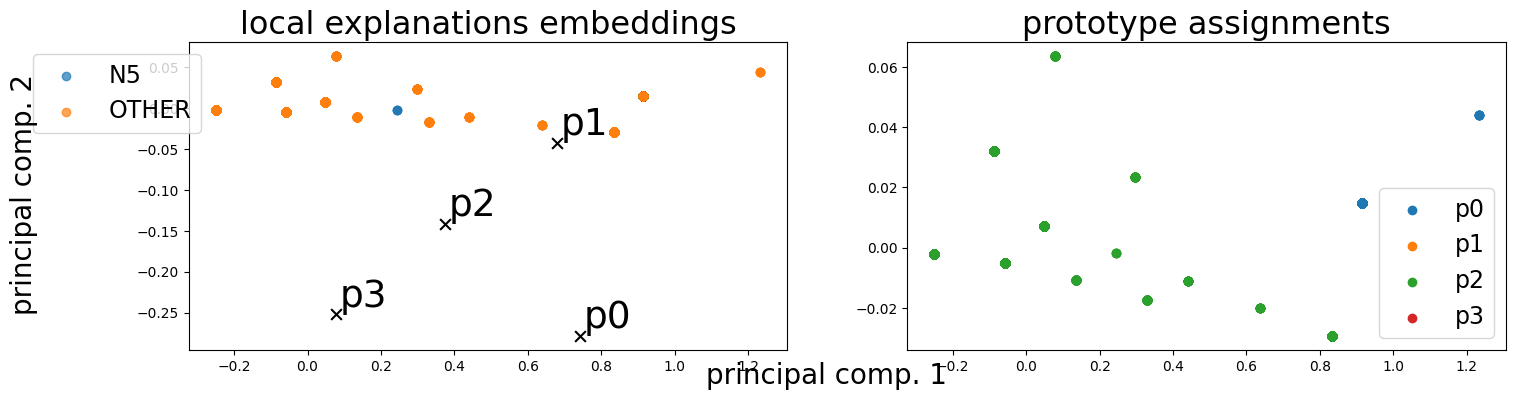

Alpha norms:
tensor([[1.0000, 0.8459, 0.8427, 0.9224],
        [0.8005, 0.7799, 1.0000, 0.8565]])
Concept Purity: 0.874990 +- 0.124686
Concept distribution:  (array([0, 2]), array([ 821, 9268]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)
  1: Loss: 0.14623, LEN: 0.091989, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.10770, V. LEN 0.078
  2: Loss: 0.09974, LEN: 0.084291, Acc: 0.00, V. Acc: 0.00, V. Loss: 0.08978, V. LEN 0.070
  3: Loss: 0.08372, LEN: 0.075026, Acc: 0.20, V. Acc: 0.92, V. Loss: 0.07493, V. LEN 0.060
  4: Loss: 0.06971, LEN: 0.063626, Acc: 0.89, V. Acc: 0.93, V. Loss: 0.06268, V. LEN 0.051
  5: Loss: 0.06030, LEN: 0.055508, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.05229, V. LEN 0.045
  6: Loss: 0.05187, LEN: 0.048114, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.04277, V. LEN 0.035
  7: Loss: 0.04538, LEN: 0.042141, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03619, V. LEN 0.031
  8: Loss: 0.04414, LEN: 0.041429, Acc: 0.90, V. Acc: 0.9

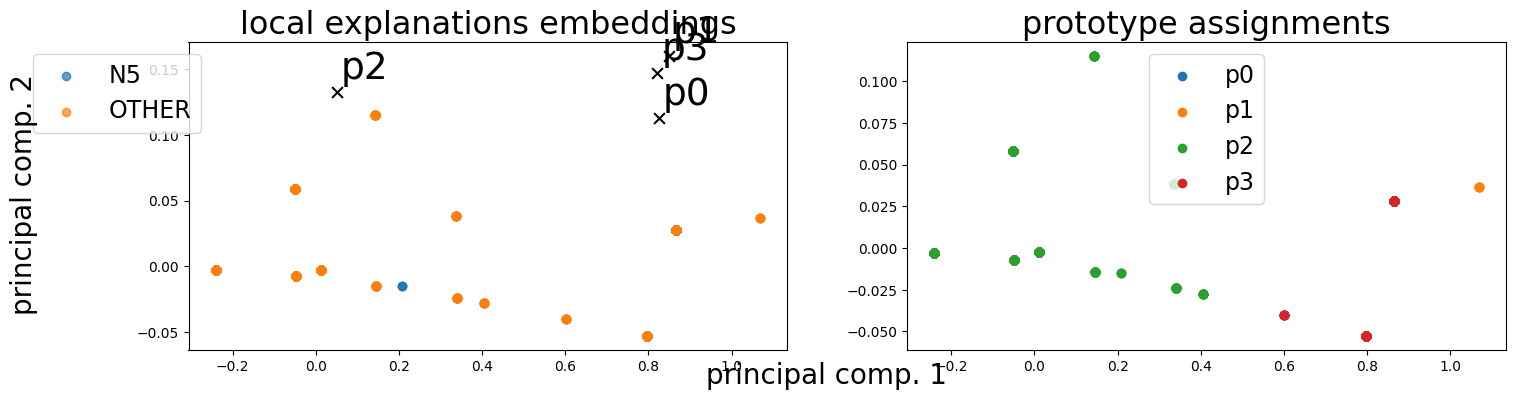

Alpha norms:
tensor([[0.5011, 0.2885, 1.0000, 0.4385],
        [0.6781, 0.3336, 1.0000, 0.4556]])
Concept Purity: 0.848236 +- 0.214384
Concept distribution:  (array([1, 2, 3]), array([   5, 8730, 1354]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.9045)

 20: Loss: 0.04176, LEN: 0.041194, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03246, V. LEN 0.031
 21: Loss: 0.04166, LEN: 0.041152, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03196, V. LEN 0.031
 22: Loss: 0.04167, LEN: 0.041166, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03298, V. LEN 0.032
 23: Loss: 0.04184, LEN: 0.041404, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03234, V. LEN 0.032
 24: Loss: 0.04159, LEN: 0.041183, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03179, V. LEN 0.031
 25: Loss: 0.04165, LEN: 0.041275, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03191, V. LEN 0.031
 26: Loss: 0.04151, LEN: 0.041154, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03180, V. LEN 0.031
 27: Loss: 0.04138, LEN: 0.041053, Acc: 0.9

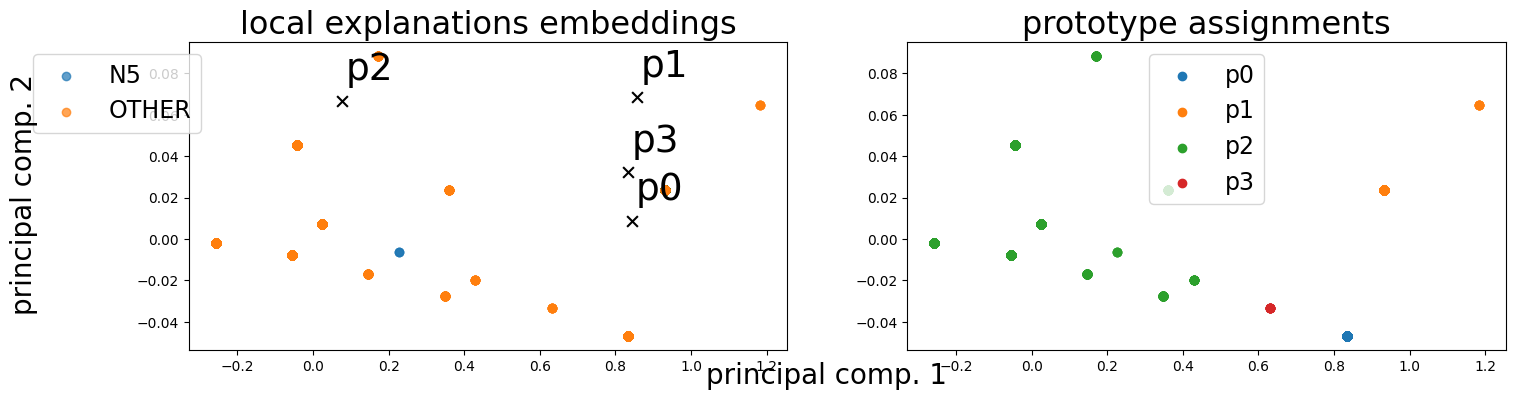

Alpha norms:
tensor([[0.7924, 0.2749, 1.0000, 0.5094],
        [1.0000, 0.1948, 0.8627, 0.4862]])
Concept Purity: 0.937490 +- 0.108072
Concept distribution:  (array([0, 1, 2, 3]), array([ 530,  821, 8730,    8]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.9045)

 40: Loss: 0.04118, LEN: 0.040940, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03049, V. LEN 0.030
 41: Loss: 0.04126, LEN: 0.041062, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03147, V. LEN 0.031
 42: Loss: 0.04119, LEN: 0.040994, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03129, V. LEN 0.031
 43: Loss: 0.04136, LEN: 0.041108, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03198, V. LEN 0.031
 44: Loss: 0.04121, LEN: 0.041013, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03005, V. LEN 0.030
 45: Loss: 0.04146, LEN: 0.041233, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03181, V. LEN 0.031
 46: Loss: 0.04141, LEN: 0.041218, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03160, V. LEN 0.031
 47: Loss: 0.04127, LEN: 0.041106,

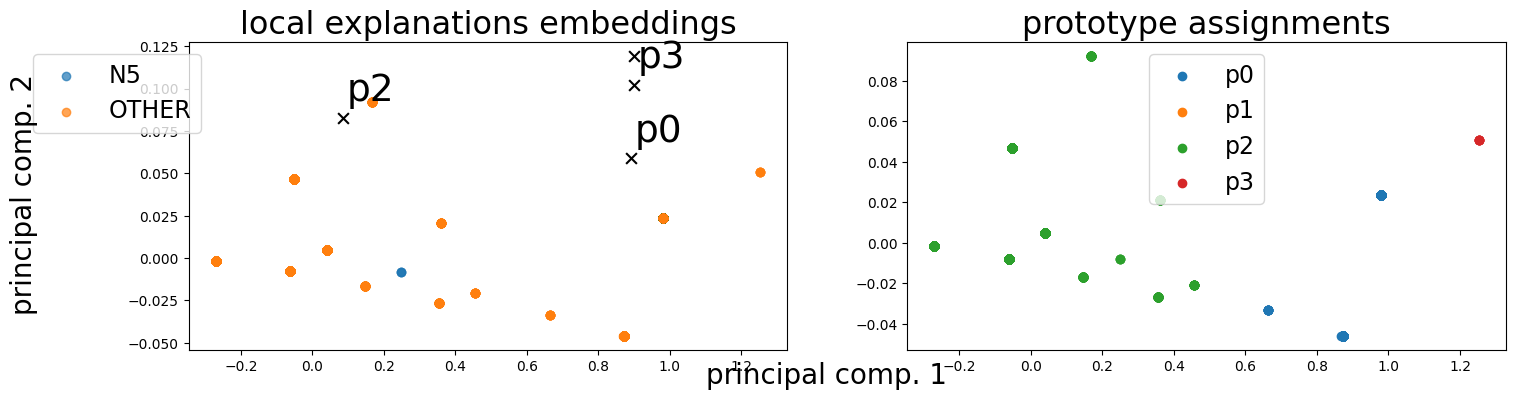

Alpha norms:
tensor([[1.0000, 0.2645, 0.8966, 0.3796],
        [1.0000, 0.1331, 0.5494, 0.2125]])
Concept Purity: 0.848236 +- 0.214384
Concept distribution:  (array([0, 2, 3]), array([1354, 8730,    5]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.9045)

 60: Loss: 0.04119, LEN: 0.040986, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03207, V. LEN 0.031
 61: Loss: 0.04123, LEN: 0.040970, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03256, V. LEN 0.031
 62: Loss: 0.04114, LEN: 0.040940, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03181, V. LEN 0.032
 63: Loss: 0.04109, LEN: 0.040900, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03190, V. LEN 0.031
 64: Loss: 0.04101, LEN: 0.040799, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03222, V. LEN 0.032
 65: Loss: 0.04108, LEN: 0.040891, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03082, V. LEN 0.030
 66: Loss: 0.04118, LEN: 0.040931, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03179, V. LEN 0.031
 67: Loss: 0.04119, LEN: 0.040950, Acc: 0.9

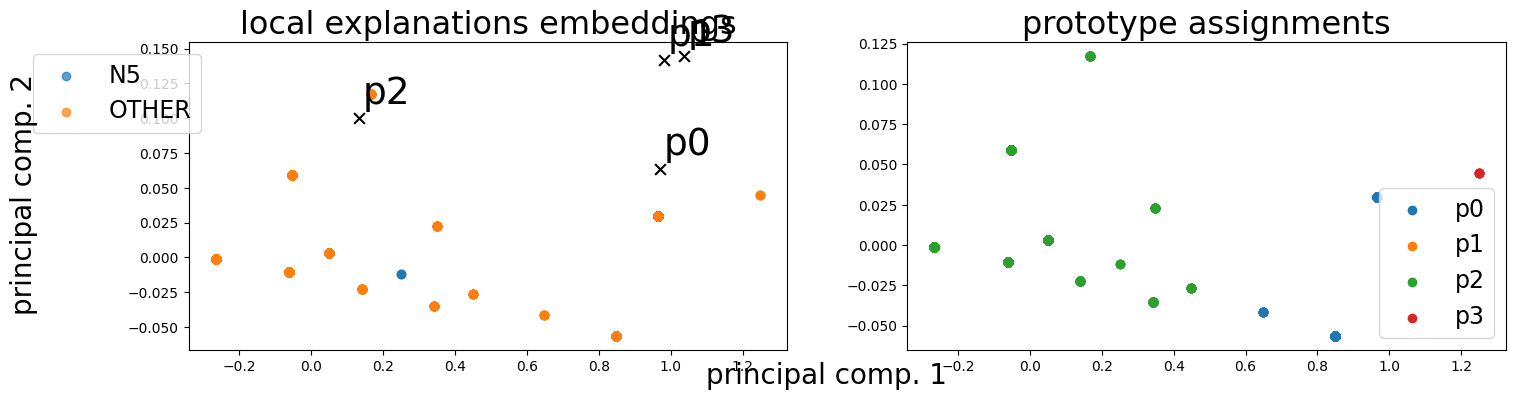

Alpha norms:
tensor([[1.0000, 0.1883, 0.6115, 0.2568],
        [1.0000, 0.0788, 0.3543, 0.1188]])
Concept Purity: 0.848236 +- 0.214384
Concept distribution:  (array([0, 2, 3]), array([1354, 8730,    5]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.9045)

 80: Loss: 0.04105, LEN: 0.040823, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03221, V. LEN 0.031
 81: Loss: 0.04124, LEN: 0.040955, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03252, V. LEN 0.032
 82: Loss: 0.04086, LEN: 0.040665, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03198, V. LEN 0.031
 83: Loss: 0.04095, LEN: 0.040767, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03278, V. LEN 0.031
 84: Loss: 0.04107, LEN: 0.040860, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03220, V. LEN 0.032
 85: Loss: 0.04109, LEN: 0.040883, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03161, V. LEN 0.031
 86: Loss: 0.04102, LEN: 0.040810, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03229, V. LEN 0.032
 87: Loss: 0.04083, LEN: 0.040636, Acc: 0.9

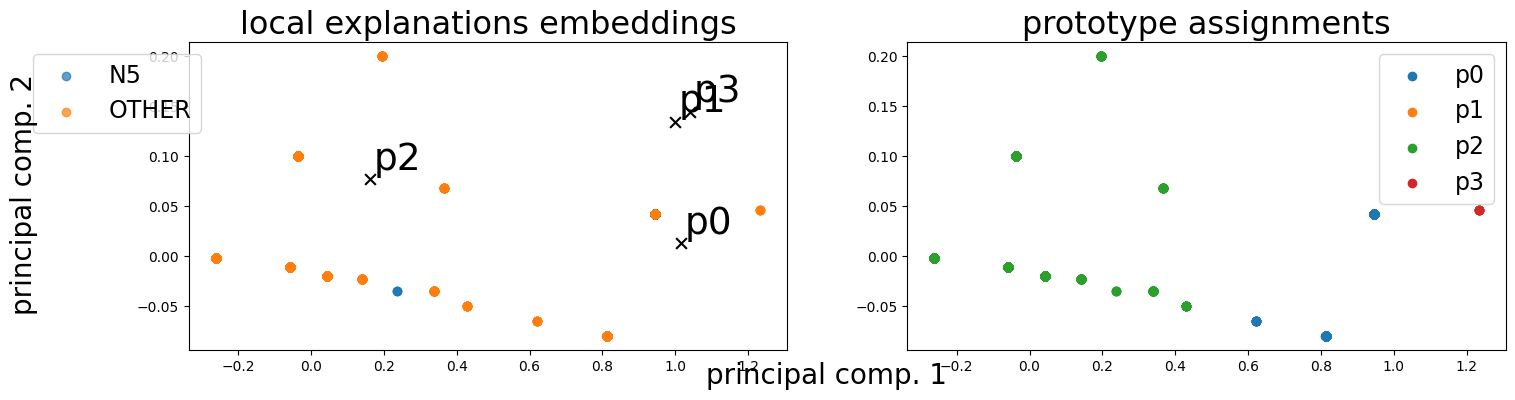

Alpha norms:
tensor([[1.0000, 0.0560, 0.1614, 0.0710],
        [1.0000, 0.0215, 0.1013, 0.0327]])
Concept Purity: 0.848236 +- 0.214384
Concept distribution:  (array([0, 2, 3]), array([1354, 8730,    5]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.9045)

100: Loss: 0.04057, LEN: 0.040312, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03330, V. LEN 0.033
101: Loss: 0.04036, LEN: 0.040139, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03242, V. LEN 0.032
102: Loss: 0.04037, LEN: 0.040196, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03346, V. LEN 0.033
103: Loss: 0.04060, LEN: 0.040336, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03115, V. LEN 0.031
104: Loss: 0.04059, LEN: 0.040348, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03033, V. LEN 0.030
105: Loss: 0.04060, LEN: 0.040370, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03078, V. LEN 0.030
106: Loss: 0.04070, LEN: 0.040446, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03343, V. LEN 0.033
107: Loss: 0.04030, LEN: 0.040114, Acc: 0.9

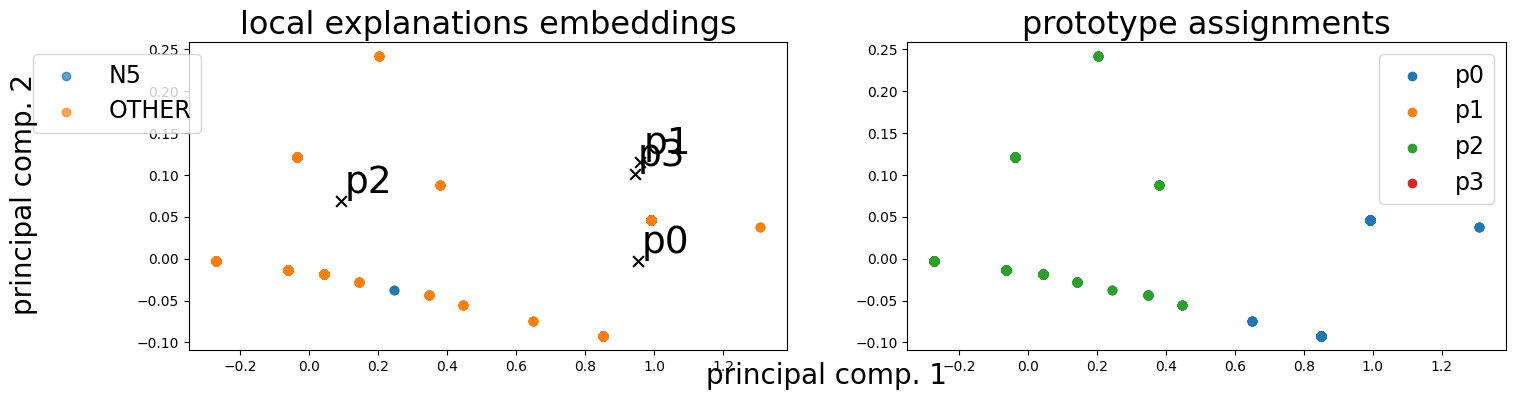

Alpha norms:
tensor([[1.0000, 0.0388, 0.1134, 0.0502],
        [1.0000, 0.0100, 0.0530, 0.0179]])
Concept Purity: 0.773191 +- 0.226465
Concept distribution:  (array([0, 2]), array([1359, 8730]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.9045)

120: Loss: 0.04068, LEN: 0.040412, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03428, V. LEN 0.034
121: Loss: 0.04021, LEN: 0.040004, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03408, V. LEN 0.034
122: Loss: 0.04087, LEN: 0.040604, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03343, V. LEN 0.033
123: Loss: 0.04032, LEN: 0.040121, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03445, V. LEN 0.034
124: Loss: 0.04021, LEN: 0.040022, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03427, V. LEN 0.034
125: Loss: 0.04018, LEN: 0.040004, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03432, V. LEN 0.034
126: Loss: 0.04041, LEN: 0.040257, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03467, V. LEN 0.034
127: Loss: 0.04053, LEN: 0.040299, Acc: 0.90, V. Acc

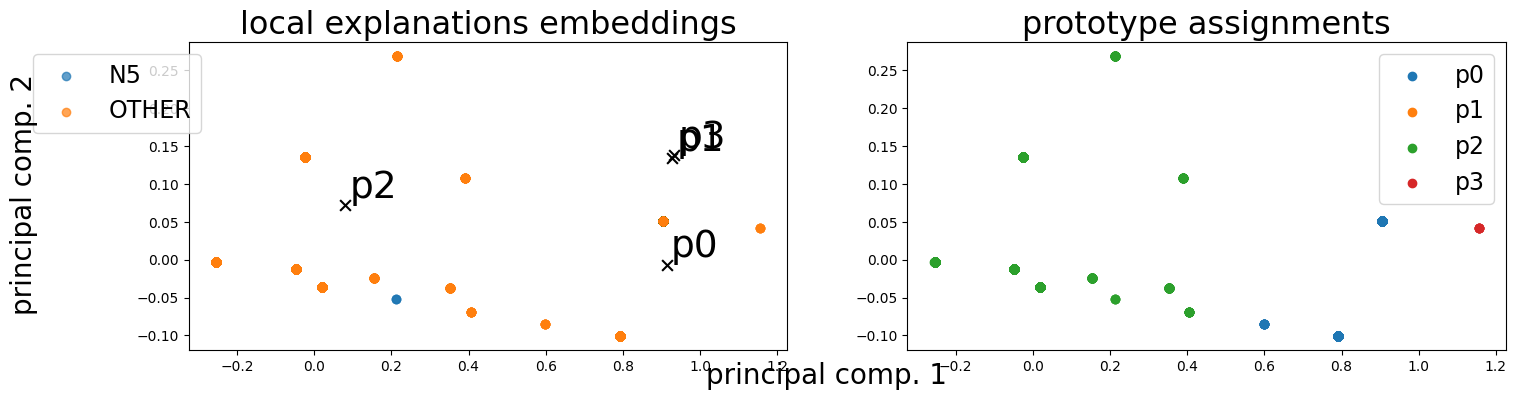

Alpha norms:
tensor([[1.0000, 0.0282, 0.0810, 0.0357],
        [1.0000, 0.0062, 0.0315, 0.0109]])
Concept Purity: 0.848236 +- 0.214384
Concept distribution:  (array([0, 2, 3]), array([1354, 8730,    5]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.9045)

140: Loss: 0.04057, LEN: 0.040324, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03437, V. LEN 0.034
141: Loss: 0.04057, LEN: 0.040373, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03429, V. LEN 0.033
142: Loss: 0.04076, LEN: 0.040429, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03480, V. LEN 0.034
143: Loss: 0.04071, LEN: 0.040501, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03466, V. LEN 0.034
144: Loss: 0.04028, LEN: 0.040088, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03479, V. LEN 0.034
145: Loss: 0.04024, LEN: 0.040058, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03534, V. LEN 0.035
146: Loss: 0.04019, LEN: 0.040018, Acc: 0.90, V. Acc: 0.93, V. Loss: 0.03459, V. LEN 0.034
147: Loss: 0.04034, LEN: 0.040184, Acc: 0.9

In [ ]:
expl.iterate(train_group_loader, test_group_loader, plot=True)

In [ ]:
expl.inspect(test_group_loader)

In [ ]:
expl.hyper["assign_func"] = "sim"

x_train, emb, concepts_assignement, y_train_1h, le_classes, le_idxs, belonging = expl.get_concept_vector(
	test_group_loader,
	return_raw=True)
expl.hyper["assign_func"] = "discrete"

proto_names = {
	0: "BA",
	1: "Wheel",
	2: "Mix",
	3: "Grid",
	4: "House",
	5: "Grid",
}
torch.manual_seed(42)
fig = plt.figure(figsize=(15, 5 * 1.8))
n = 0
for p in range(expl.hyper["num_prototypes"]):
	idxs = le_idxs[concepts_assignement.argmax(-1) == p]
	# idxs = idxs[torch.randperm(len(idxs))]    # random
	sa = concepts_assignement[concepts_assignement.argmax(-1) == p]
	idxs = idxs[torch.argsort(sa[:, p], descending=True)]
	for ex in range(min(5, len(idxs))):
		n += 1
		ax = plt.subplot(expl.hyper["num_prototypes"], 5, n)
		G = to_networkx(dataset_test[int(idxs[ex])], to_undirected=True,
						remove_self_loops=True)
		pos = nx.spring_layout(G, seed=42)
		nx.draw(G, pos, node_size=20, ax=ax, node_color="orange")
		ax.axis("on")
		plt.box(False)

for p in range(expl.hyper["num_prototypes"]):
	plt.subplot(expl.hyper["num_prototypes"], 5, 5 * p + 1)
	plt.ylabel(f"$P_{p}$\n", size=25, rotation="horizontal",
			   labelpad=50)

plt.show()

In [ ]:
fig, axs = plt.subplots(9, 9, figsize=(10, 10))
axs = axs.flatten()

for i in range(81):
	G = nx.Graph(adjs_train[i], undirected=True)
	G.remove_edges_from(nx.selfloop_edges(G))
	pos = nx.spring_layout(G, seed=42)
	nx.draw(G, pos, ax=axs[i], node_color="orange", node_size=25)

In [ ]:
import numpy as np
data = np.load("local_features/PGExplainer/Distributive_weak/x_train.npz")
y = np.load("local_features/PGExplainer/Distributive_weak/y_train.npy")
adjs = list(data.values())

fig, axs = plt.subplots(9, 9, figsize=(15, 15))
axs = axs.flatten()

for i in range(81):
	adj = adjs[i].squeeze()
	adj[adj > 0] = 1
	G = nx.Graph(adj, undirected=True)
	G.remove_edges_from(nx.selfloop_edges(G))
	pos = nx.spring_layout(G, seed=42)
	nx.draw(G, pos, ax=axs[i], node_color="orange", node_size=10)
	axs[i].set_title(f'Class={y[i]}')